# 画图种类

## Scatter 散点图

> 本节我们将讲述各种不同的plot的方式。之前我们讲到了如何plot线，今天我们讲述如何plot散点图。 今天用到的例子最终呈现的结果如下图：


### 散点图
> 首先，先引入matplotlib.pyplot简写作plt,再引入模块numpy用来产生一些随机数据。生成1024个呈标准正态分布的二维数据组 (平均数是0，方差为1) 作为一个数据集，并图像化这个数据集。每一个点的颜色值用T来表示：

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

输入X和Y作为location，size=75，颜色为T，color map用默认值，透明度alpha 为 50%。 x轴显示范围定位(-1.5，1.5)，并用xtick()函数来隐藏x坐标轴，y轴同理：

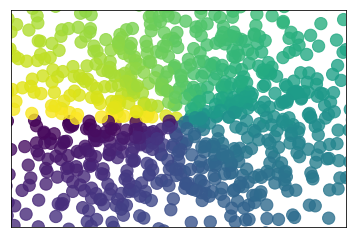

X:[-1.14617341  0.19817326  2.94361446 ...  0.02674152  0.49823653
  0.83739606] Len:1024
Y:[ 0.8425881  -0.10723956 -0.25195068 ...  0.59775869  1.19250032
 -0.0865168 ] Len:1024
T:[ 2.50767554 -0.49601582 -0.08538418 ...  1.52608981  1.17503285
 -0.10295119] Len:1024


In [11]:
plt.scatter(X, Y, s=150, c=T, alpha=.8)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()
print('X:{} Len:{}'.format(X,len(X)))
print('Y:{} Len:{}'.format(Y, len(Y)))
print('T:{} Len:{}'.format(T, len(T)))

## Bar 柱状图

> 相关代码
本节我们介绍一下用matplotib来制作一个柱状图

### 生成基本图形
> 向上向下分别生成12个数据，X为 0 到 11 的整数 ，Y是相应的均匀分布的随机数据。 使用的函数是plt.bar，参数为X和Y：

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)

Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

print("X:{}".format(X))
print("Y1:{}".format(Y1))
print("Y2:{}".format(Y2))

plt.bar(X, +Y1)
plt.bar(X, -Y2)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

X:[ 0  1  2  3  4  5  6  7  8  9 10 11]
Y1:[0.86525502 0.4792952  0.44280002 0.67559387 0.53819528 0.5728185
 0.33276337 0.30798742 0.21714717 0.19822221 0.10862067 0.05767891]
Y2:[0.7750823  0.91480681 0.67332737 0.59305321 0.54922892 0.51931946
 0.29709095 0.33388738 0.22175604 0.21806564 0.09198326 0.06278002]


<Figure size 640x480 with 1 Axes>

## 加颜色和数据
> 下面我们就颜色和数值进行优化。 用facecolor设置主体颜色，edgecolor设置边框颜色为白色

<BarContainer object of 12 artists>

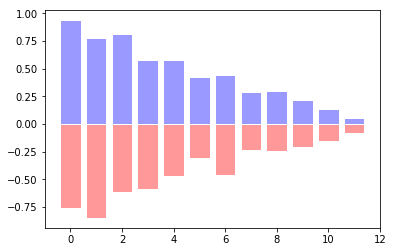

In [34]:
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

接下来我们用函数 **plt.text** 分别在柱体上方（下方）加上数值，用%.2f保留两位小数，横向居中对齐ha='center'，纵向底部（顶部）对齐va='bottom'：

X:[ 0  1  2  3  4  5  6  7  8  9 10 11]
Y1:[0.74722253 0.65784616 0.80497725 0.52189404 0.4956897  0.56002099
 0.41466864 0.31445707 0.23009552 0.19942767 0.11561381 0.0634954 ]
Y2:[0.98058334 0.67892532 0.8199445  0.66376245 0.46277669 0.56093314
 0.30269168 0.28189881 0.22265158 0.13357179 0.12787388 0.0507053 ]


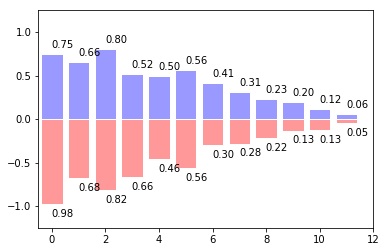

In [2]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)

Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

print("X:{}".format(X))
print("Y1:{}".format(Y1))
print("Y2:{}".format(Y2))

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

plt.xlim(-.5, n)
# plt.xticks(())
plt.ylim(-1.25, 1.25)
# plt.yticks(())

for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x + 0.4, -y - 0.05, '%.2f' % y, ha='center', va='top')

plt.show()

## Contours 等高线图
### 画等高线

数据集即三维点 (x,y) 和对应的高度值，共有256个点。高度值使用一个 height function f(x,y) 生成。 x, y 分别是在区间 [-3,3] 中均匀分布的256个值，并用meshgrid在二维平面中将每一个x和每一个y分别对应起来，编织成栅格:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    # the height function
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

接下来进行颜色填充。使用函数plt.contourf把颜色加进去，位置参数分别为：X, Y, f(X,Y)。透明度0.75，并将 f(X,Y) 的值对应到color map的暖色组中寻找对应颜色。

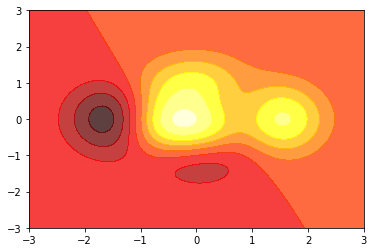

In [6]:
# use plt.contourf to filling contours
# X, Y and value for (X,Y) point
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)

接下来进行等高线绘制。使用plt.contour函数划线。位置参数为：X, Y, f(X,Y)。颜色选黑色，线条宽度选0.5。现在的结果如下图所示，只有颜色和线条，还没有数值Label：

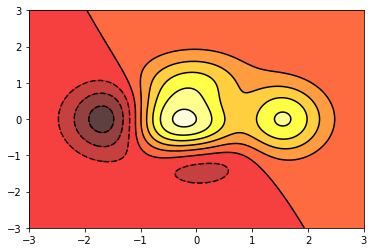

In [8]:
# use plt.contourf to filling contours
# X, Y and value for (X,Y) point
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
# use plt.contour to add contour lines
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)

### 添加高度数字

其中，8代表等高线的密集程度，这里被分为10个部分。如果是0，则图像被一分为二。

最后加入Label，inline控制是否将Label画在线里面，字体大小为10。并将坐标轴隐藏：

([], <a list of 0 Text yticklabel objects>)

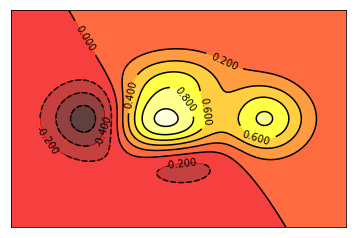

In [10]:
# use plt.contourf to filling contours
# X, Y and value for (X,Y) point
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
# use plt.contour to add contour lines
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())

## Image 图片
### 随机矩阵画图
> 这一节我们讲解怎样在matplotlib中打印出图像。这里我们打印出的是纯粹的数字，而非自然图像。 我们今天用这样 3x3 的 2D-array 来表示点的颜色，每一个点就是一个pixel。

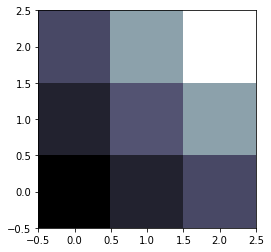

In [16]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')

三行三列的格子，a代表每一个值，图像右边有一个注释，白色代表值最大的地方，颜色越深值越小.  

我们之前选cmap的参数时用的是：cmap=plt.cmap.bone，而现在，我们可以直接用单引号传入参数。 origin='lower'代表的就是选择的原点的位置。

### 出图方式
> 我们在这个链接 可以看到 [matplotlib官网](https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html) 上对于内插法的不同方法的描述。下图是一个示例：

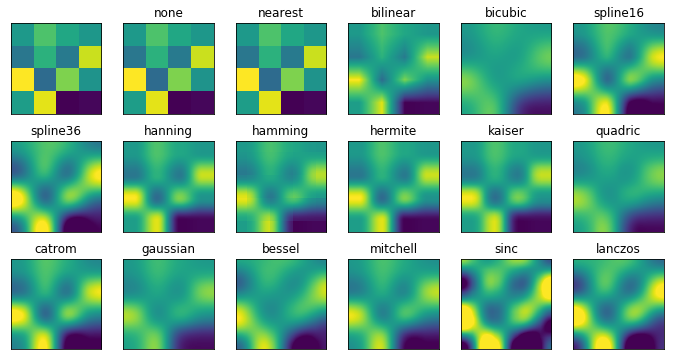

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# from the docs:

# If interpolation is None, default to rc image.interpolation. See also
# the filternorm and filterrad parameters. If interpolation is 'none', then
# no interpolation is performed on the Agg, ps and pdf backends. Other
# backends will fall back to 'nearest'.
#
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

np.random.seed(0)
grid = np.random.rand(4, 4)

fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(interp_method)

plt.show()

### colorbar
> 下面我们添加一个colorbar ，其中我们添加一个shrink参数，使colorbar的长度变短为原来的92%：

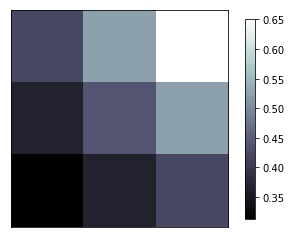

In [24]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()


## 3D 数据
### 3D 图
> 首先在进行 3D Plot 时除了导入 matplotlib ，还要额外添加一个模块，即 Axes 3D 3D 坐标轴显示：

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



之后要先定义一个图像窗口，在窗口上添加3D坐标轴，显示成下图：


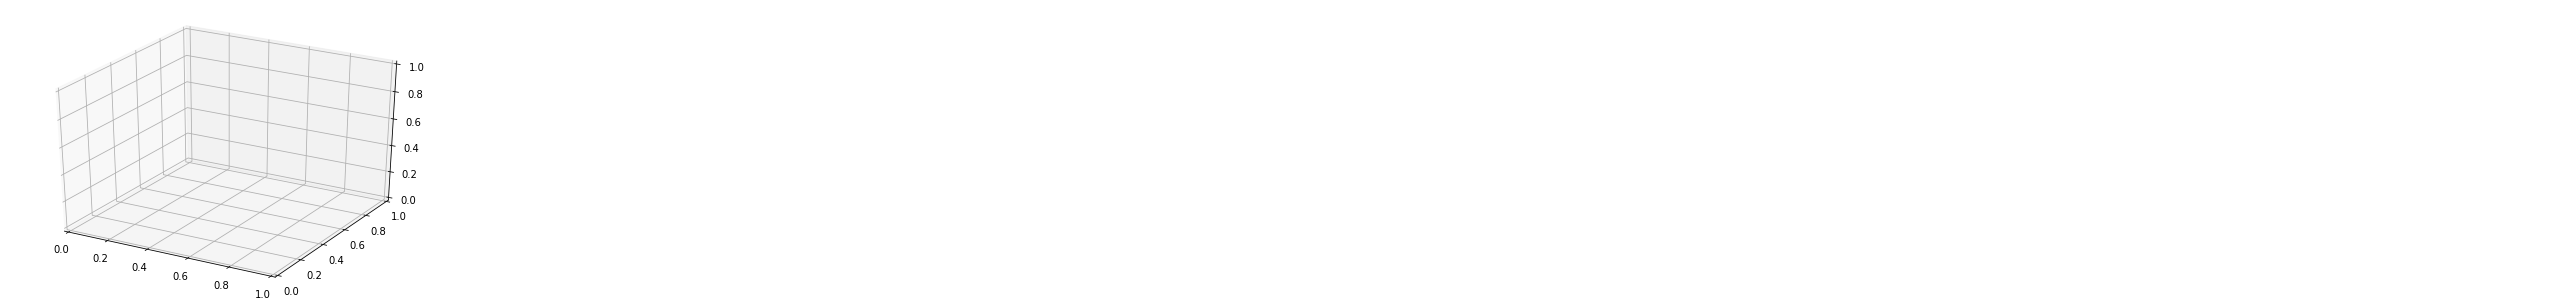

In [28]:
fig = plt.figure()
ax = Axes3D(fig)

接下来给进 X 和 Y 值，并将 X 和 Y 编织成栅格。每一个（X, Y）点对应的高度值我们用下面这个函数来计算

做出一个三维曲面，并将一个 colormap rainbow 填充颜色，之后将三维图像投影到 XY 平面上做一个等高线图。 plot 3D 图像：

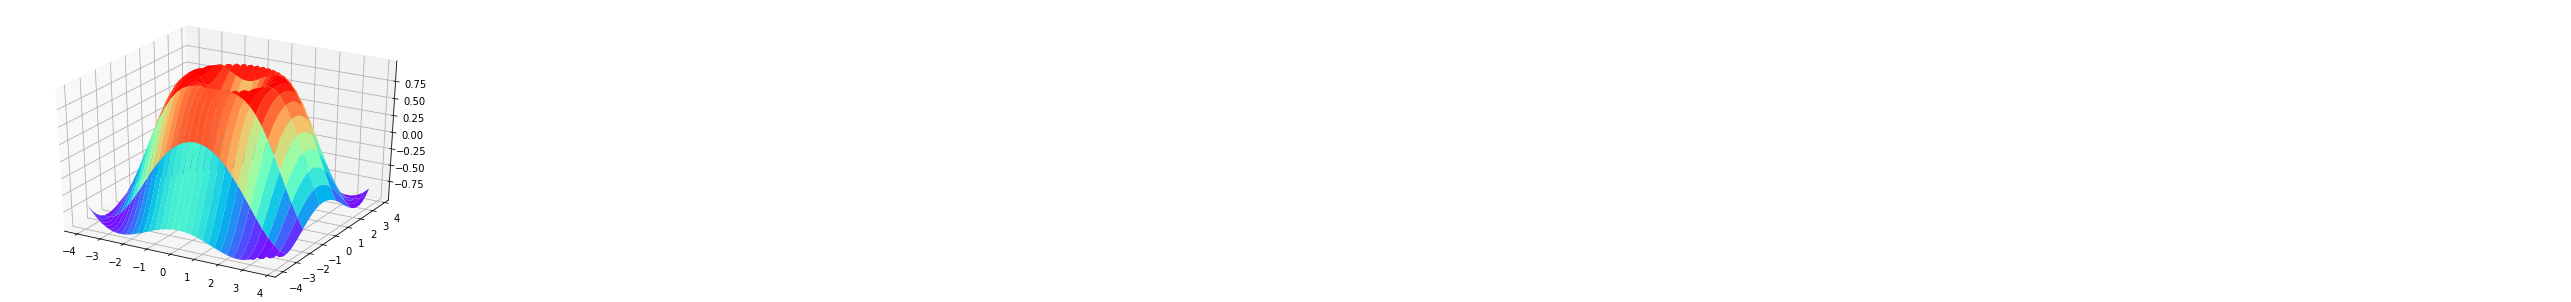

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

其中，rstride 和 cstride 分别代表 row 和 column 的跨度。

### 投影

>下面添加 XY 平面的等高线

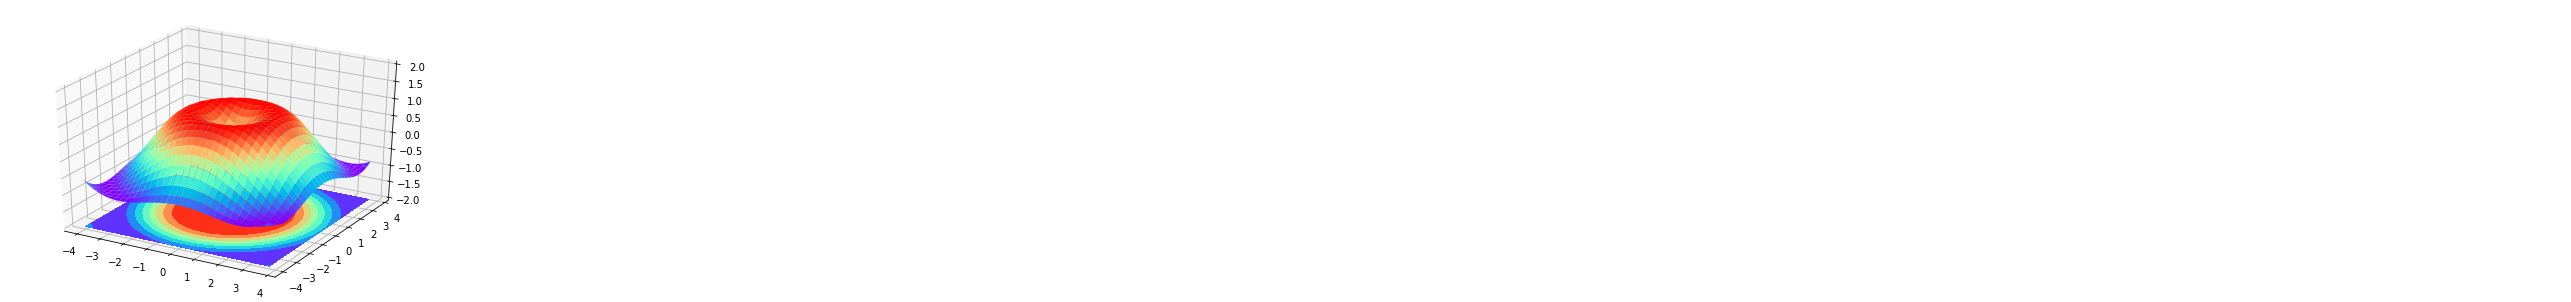

In [58]:
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)
ax.set_zlim(-2,2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))

如果 zdir 选择了x，那么效果将会是对于 XZ 平面的投影，效果如下：

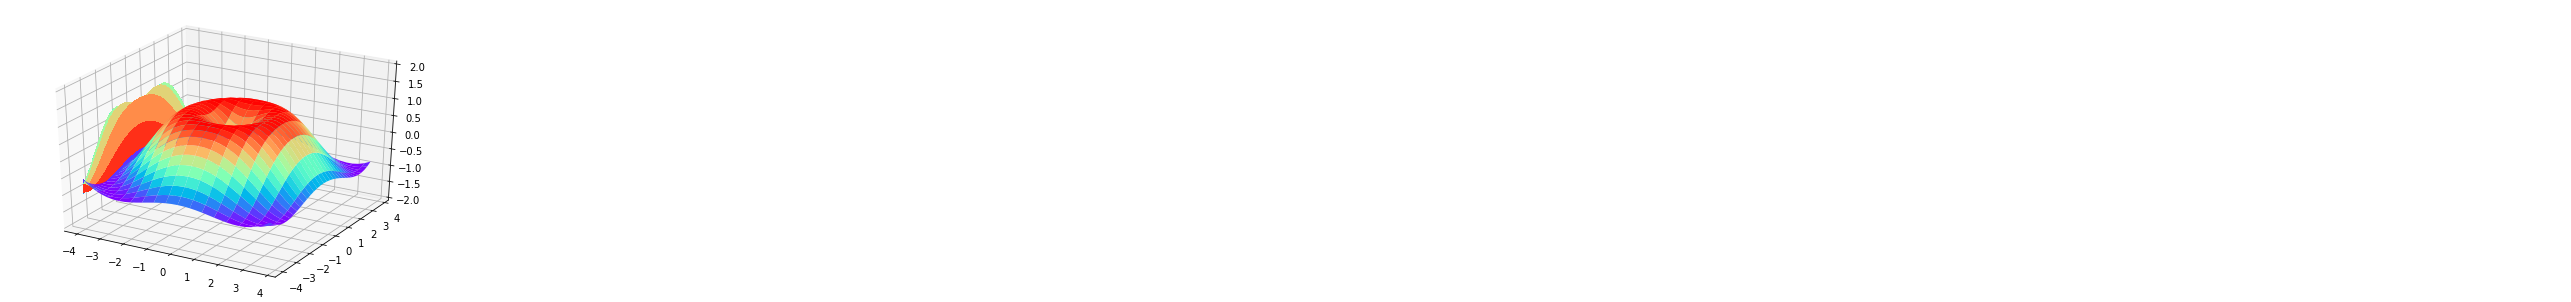

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)
ax.set_zlim(-2,2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=2, cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z, zdir='x', offset=-4, cmap=plt.get_cmap('rainbow'))